In [60]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
from urllib.request import urlopen
import matplotlib.dates as mdates
import json
import csv
from datetime import datetime
import time
import datetime as dt
import time

In [2]:
def graph_data():
    url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=demo"
    response = urlopen(url)
    data = response.read().decode("utf-8")
    data=json.loads(data)
    employee_data = data['historical']
    data_file = open('data_file.csv', 'w')
    csv_writer = csv.writer(data_file)
    count = 0
    for emp in employee_data:
        if count == 0:
            header = emp.keys()
            csv_writer.writerow(header)
            count += 1
        csv_writer.writerow(emp.values())


In [3]:
graph_data()

In [57]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    ax1.plot_date(date,closep,"-",label="Price")
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True,color="g",linestyle="-",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Financial Data")
    plt.legend()
    plt.subplots_adjust(left=0.09,bottom=0.16,top=0.95,right=0.99,wspace=0.2,hspace=0)

/Volumes/Transcend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  This is separate from the ipykernel package so we can avoid doing imports until


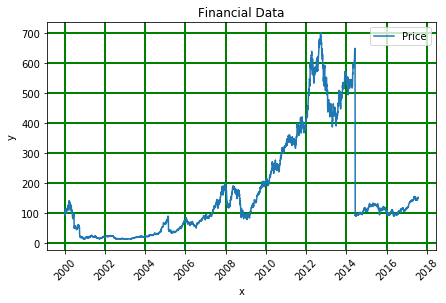

In [58]:
graph_data()


In [63]:
print(datetime.fromtimestamp(time.time()))

2020-06-21 19:04:58.038235


In [66]:
dateconv = np.vectorize(datetime.fromtimestamp)

In [67]:
date = dateconv(time.time())

In [69]:
print(date)

2020-06-21 19:09:06.849002
